### Data Shifting Experiment

### MIMIC CXR

* [Dataset](https://physionet.org/content/mimic-cxr/2.0.0/)

* [Original Paper](https://www.nature.com/articles/s41597-019-0322-0)

In [1]:
%cd ..

/home/datascience/Data Fusion


In [2]:
import os
import numpy as np
import pandas as pd

from src.classifiers import preprocess_data, process_labels, split_data
from src.classifiers import VQADataset
from torch.utils.data import DataLoader
from src.classifiers import train_early_fusion, train_late_fusion

from utils import normalize_embeddings, modify_and_normalize_embeddings, visualize_embeddings, plot_results, update_column_names

In [3]:
PATH = 'Embeddings/mimic/'
FILE = 'embeddings.csv'
DATASET = 'mimic'

batch_size = 32

output_size = 4
multilabel = False

num_epochs = 50

In [4]:
df = pd.read_csv(os.path.join(PATH, FILE))
df.disease_label = df.disease_label.astype(str)
df.head()

path  race_label  sex_label  \
0  p19/p19702416/s51321189/d85c9f15-f0f84927-761f...           0          0   
1  p13/p13339704/s51292704/0024603b-12db30e2-ab32...           2          0   
2  p13/p13339704/s51292704/7953848d-2411f0df-859f...           2          0   
3  p12/p12668169/s54048859/8a4aaaee-55fcf98f-a036...           0          0   
4  p10/p10309415/s58144222/9886b0fe-9121c65e-c8d7...           0          0   

  disease_label  subject_id  study_id  split  \
0             3    19702416  51321189  train   
1             3    13339704  51292704  train   
2             3    13339704  51292704  train   
3             3    12668169  54048859  train   
4             3    10309415  58144222  train   

                                          file_path    text_1    text_2  ...  \
0  datasets/mimic/files/p19/p19702416/s51321189.txt  0.019312 -0.016845  ...   
1  datasets/mimic/files/p13/p13339704/s51292704.txt  0.012198 -0.027218  ...   
2  datasets/mimic/files/p13/p13339704/s51292704.txt  0.012198 -0.027218  ...   
3  datasets/mimic/files/p12/p12668169/s54048859.txt  0.023151 -0.003735  ...   
4  datasets/mimic/files/p10/p10309415/s58144222.txt  0.022132 -0.021821  ...   

   image_758  image_759  image_760  image_761  image_762  image_763  \
0  -1.977094   0.664772  -2.003561   0.063048   0.218469  -2.259382   
1  -2.502330  -0.262871  -2.777717   1.082299   1.273291  -1.900938   
2  -2.352660   0.049591  -2.599992   0.709397   0.635155  -2.035155   
3  -2.531913   0.778623  -3.406011   0.288661   1.660015  -2.785958   
4  -1.868888   0.562119  -1.824777   0.069089   1.093687  -1.628035   

   image_764  image_765  image_766  image_767  
0  -1.804749  -3.272988   1.671752  -2.163086  
1  -1.250531  -3.238538   1.466622  -3.243235  
2  -1.170720  -3.293882   1.306690  -2.955477  
3  -1.350666  -2.999661   2.809513  -3.075176  
4  -1.373444  -3.014874   1.524349  -2.403681  

[5 rows x 4872 columns]

In [5]:
# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column]
image_columns = [column for column in df.columns if 'image' in column]
label_columns = 'disease_label'

### Run Experiments

##################################################  Shift -1  ##################################################


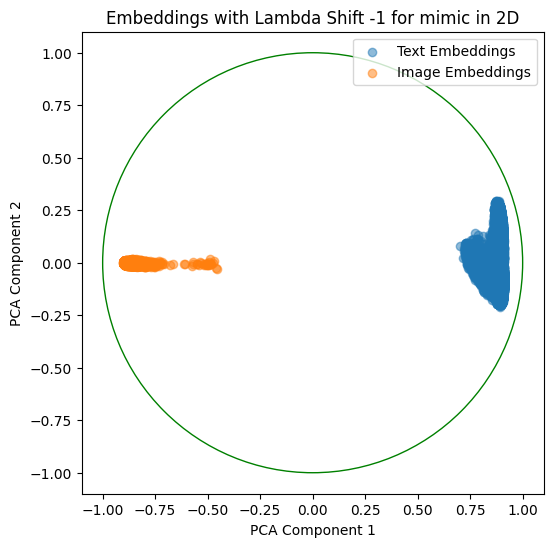

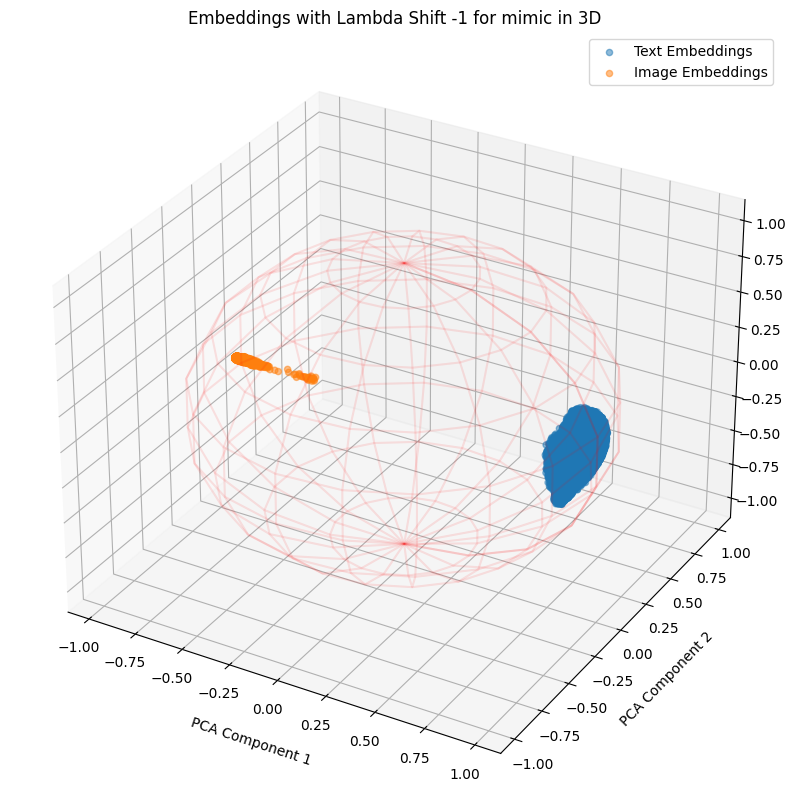

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.53 seconds
Total Training Time per Epoch: 1026.30 seconds
Average Inference Time per Epoch: 2.63 seconds
Total Inference Time per Epoch: 131.37 seconds


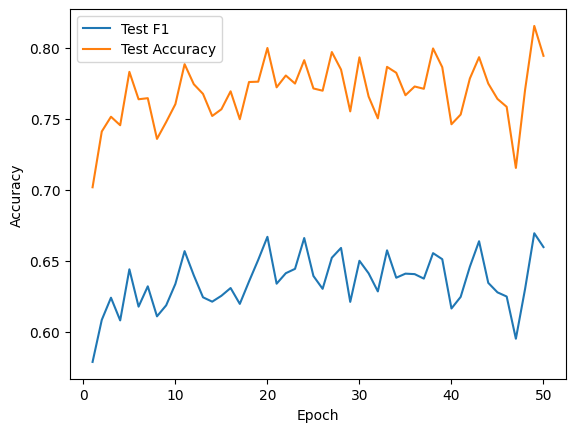

Best Accuracy: {'Acc': 0.8155467720685112, 'F1': 0.6694366005688503, 'Epoch': 49}
Best Macro-F1: {'Acc': 0.8155467720685112, 'F1': 0.6694366005688503, 'Epoch': 49}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 20.99 seconds
Total Training Time per Epoch: 1049.32 seconds
Average Inference Time per Epoch: 2.66 seconds
Total Inference Time per Epoch: 133.21 seconds


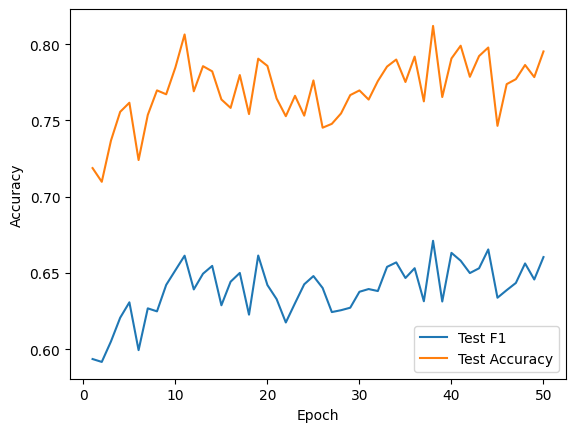

Best Accuracy: {'Acc': 0.8119565217391305, 'F1': 0.6710672752536642, 'Epoch': 38}
Best Macro-F1: {'Acc': 0.8119565217391305, 'F1': 0.6710672752536642, 'Epoch': 38}
##################################################  Shift -0.9  ##################################################


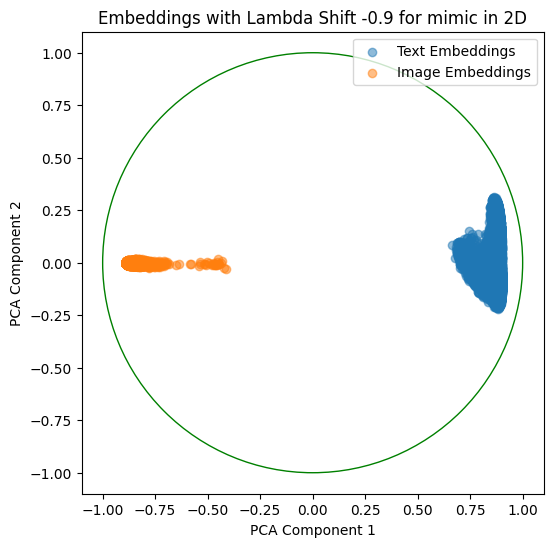

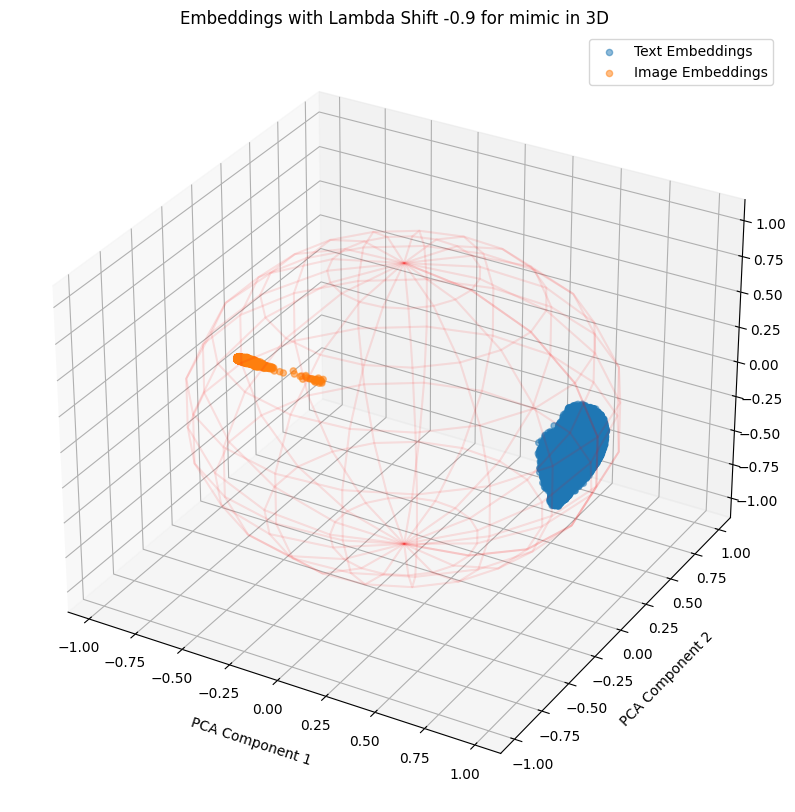

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.10 seconds
Total Training Time per Epoch: 1054.84 seconds
Average Inference Time per Epoch: 3.29 seconds
Total Inference Time per Epoch: 164.69 seconds


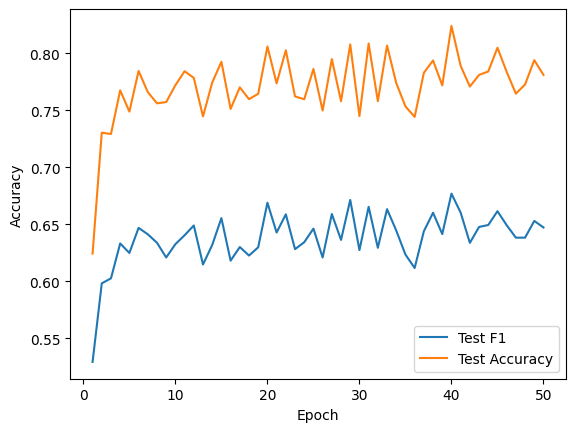

Best Accuracy: {'Acc': 0.8239130434782609, 'F1': 0.6767723170079598, 'Epoch': 40}
Best Macro-F1: {'Acc': 0.8239130434782609, 'F1': 0.6767723170079598, 'Epoch': 40}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.48 seconds
Total Training Time per Epoch: 924.03 seconds
Average Inference Time per Epoch: 3.28 seconds
Total Inference Time per Epoch: 164.18 seconds


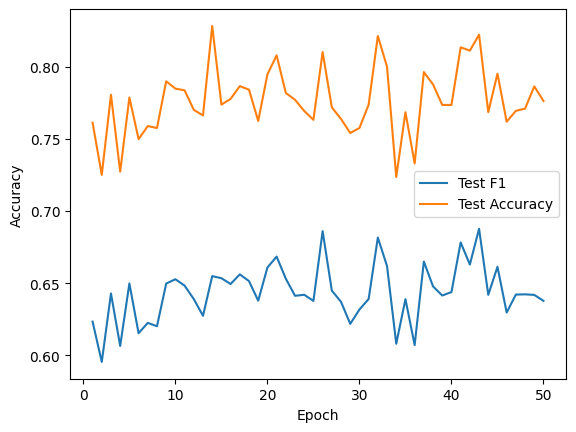

Best Accuracy: {'Acc': 0.8282938076416337, 'F1': 0.6549015118253755, 'Epoch': 14}
Best Macro-F1: {'Acc': 0.8222332015810276, 'F1': 0.6877345455159276, 'Epoch': 43}
##################################################  Shift -0.8  ##################################################


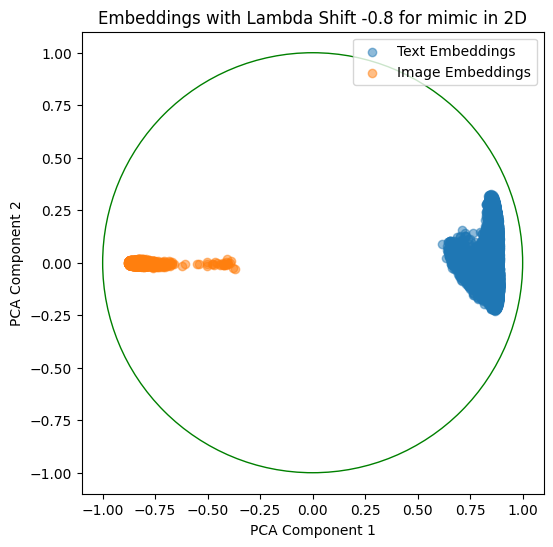

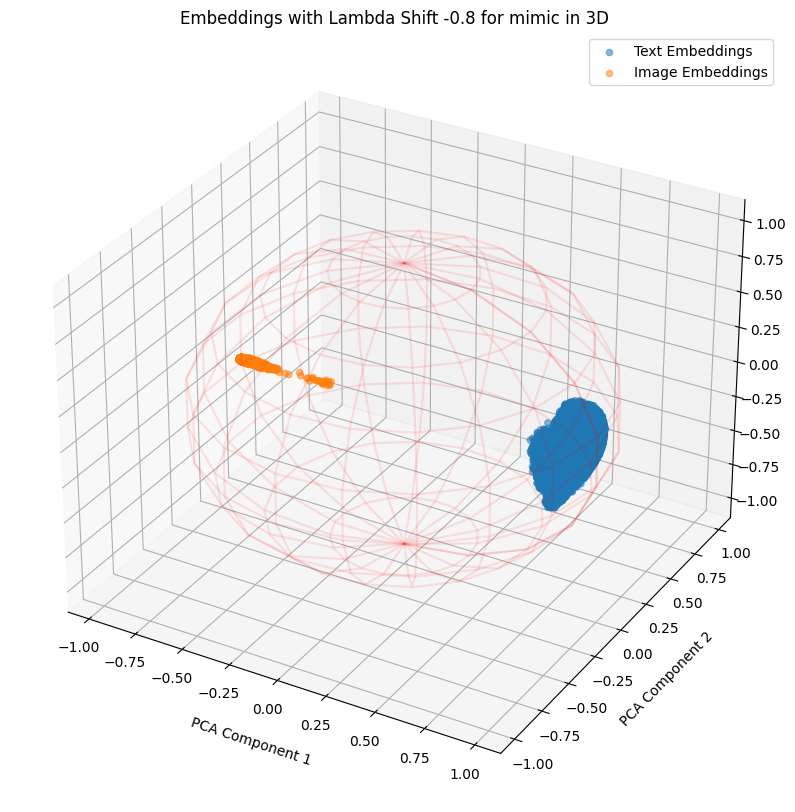

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 22.55 seconds
Total Training Time per Epoch: 1127.49 seconds
Average Inference Time per Epoch: 3.55 seconds
Total Inference Time per Epoch: 177.43 seconds


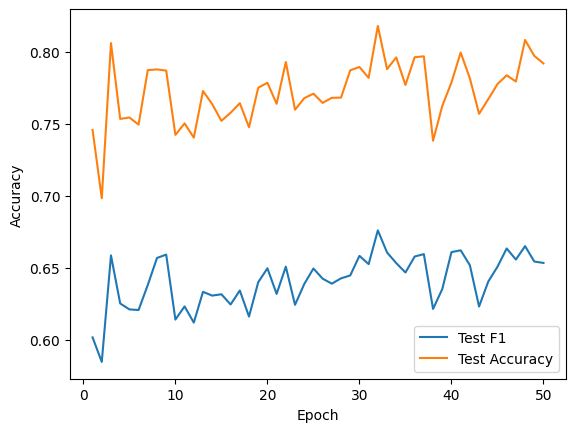

Best Accuracy: {'Acc': 0.8179183135704875, 'F1': 0.675913031742372, 'Epoch': 32}
Best Macro-F1: {'Acc': 0.8179183135704875, 'F1': 0.675913031742372, 'Epoch': 32}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.65 seconds
Total Training Time per Epoch: 932.58 seconds
Average Inference Time per Epoch: 3.39 seconds
Total Inference Time per Epoch: 169.69 seconds


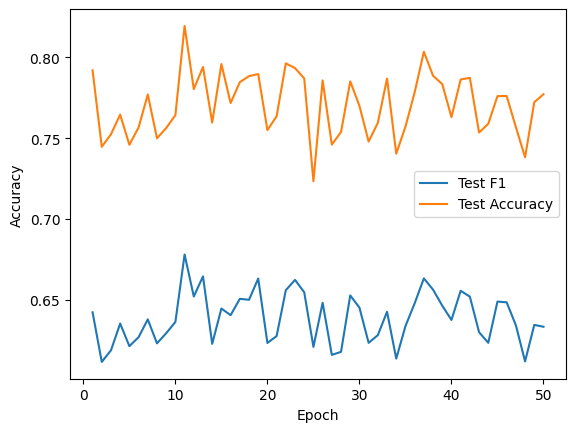

Best Accuracy: {'Acc': 0.81933465085639, 'F1': 0.6781151086491477, 'Epoch': 11}
Best Macro-F1: {'Acc': 0.81933465085639, 'F1': 0.6781151086491477, 'Epoch': 11}
##################################################  Shift -0.7  ##################################################


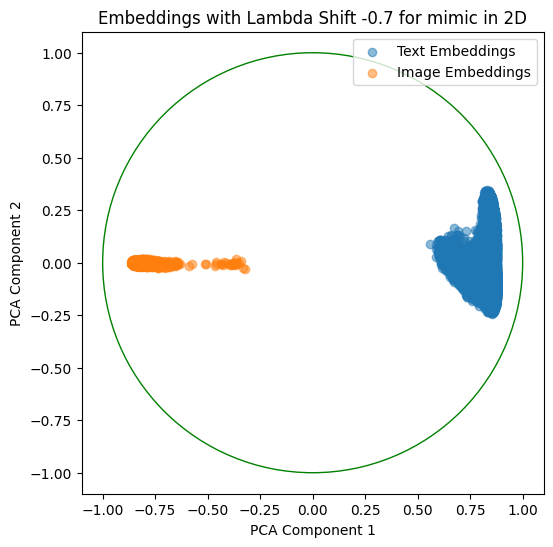

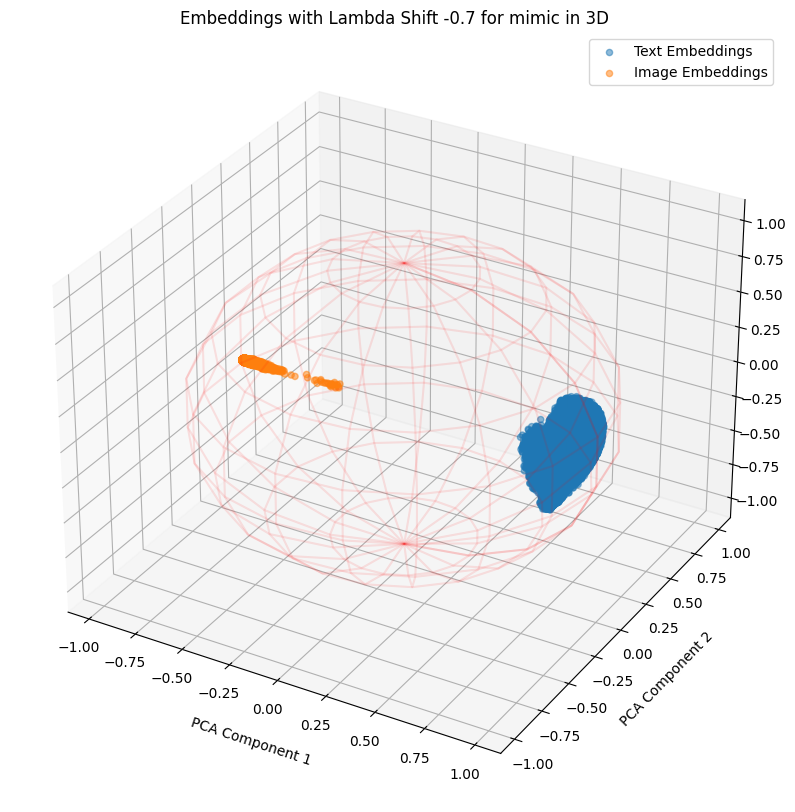

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.39 seconds
Total Training Time per Epoch: 1069.37 seconds
Average Inference Time per Epoch: 3.44 seconds
Total Inference Time per Epoch: 172.01 seconds


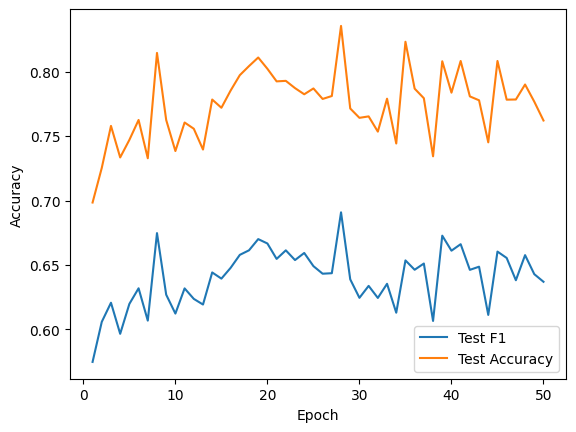

Best Accuracy: {'Acc': 0.8354743083003953, 'F1': 0.6908498967171643, 'Epoch': 28}
Best Macro-F1: {'Acc': 0.8354743083003953, 'F1': 0.6908498967171643, 'Epoch': 28}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.53 seconds
Total Training Time per Epoch: 926.60 seconds
Average Inference Time per Epoch: 3.38 seconds
Total Inference Time per Epoch: 168.78 seconds


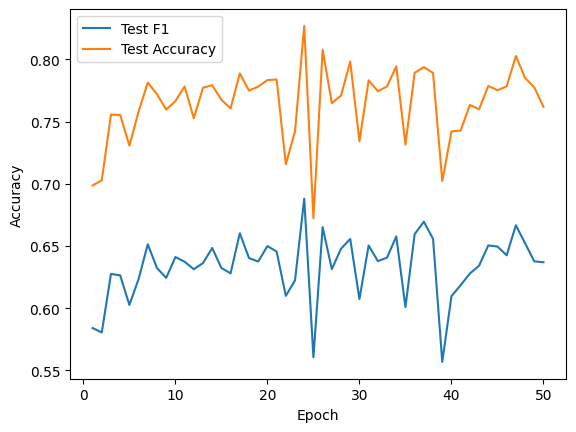

Best Accuracy: {'Acc': 0.8269433465085639, 'F1': 0.6880197749619178, 'Epoch': 24}
Best Macro-F1: {'Acc': 0.8269433465085639, 'F1': 0.6880197749619178, 'Epoch': 24}
##################################################  Shift -0.6  ##################################################


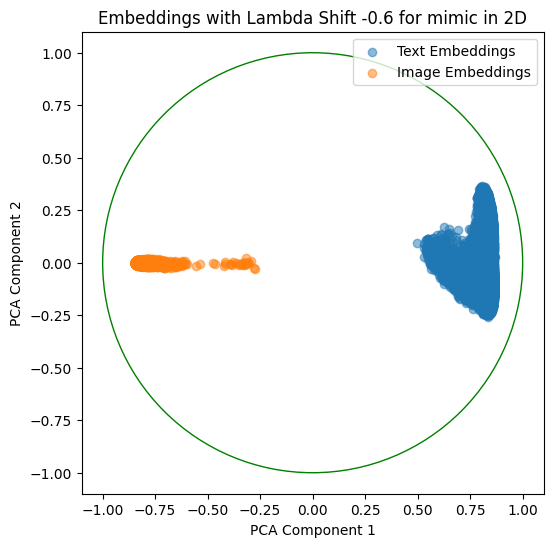

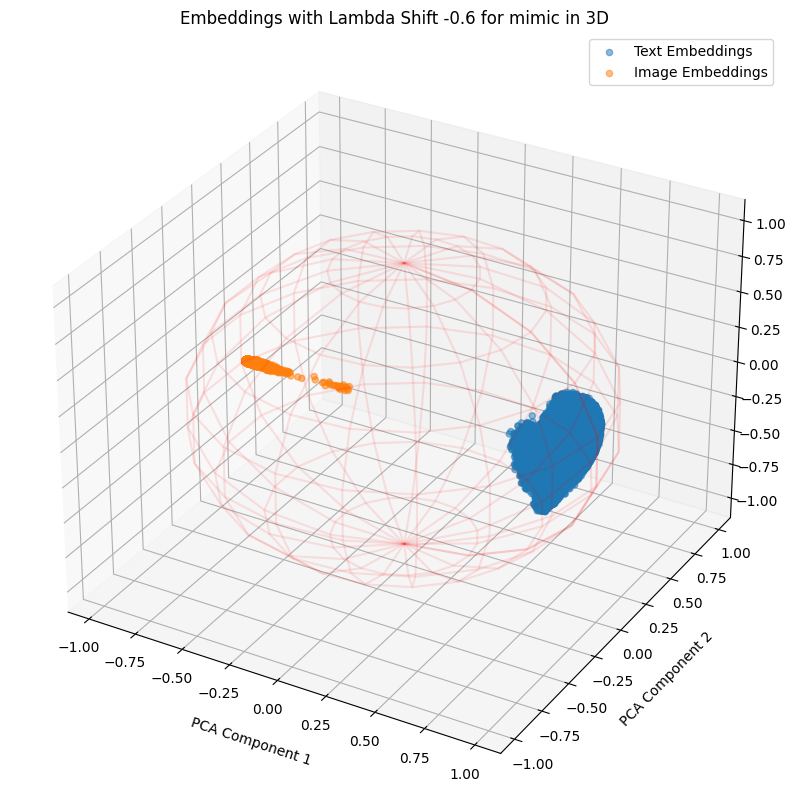

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.11 seconds
Total Training Time per Epoch: 1055.50 seconds
Average Inference Time per Epoch: 3.40 seconds
Total Inference Time per Epoch: 169.92 seconds


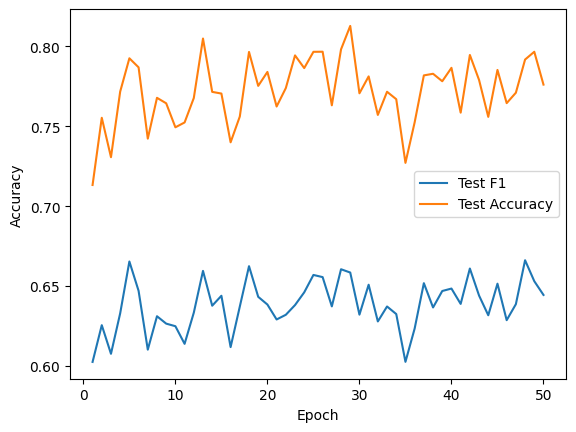

Best Accuracy: {'Acc': 0.8127799736495389, 'F1': 0.6584554759301452, 'Epoch': 29}
Best Macro-F1: {'Acc': 0.7917325428194993, 'F1': 0.6661538095231423, 'Epoch': 48}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.49 seconds
Total Training Time per Epoch: 924.58 seconds
Average Inference Time per Epoch: 3.38 seconds
Total Inference Time per Epoch: 169.14 seconds


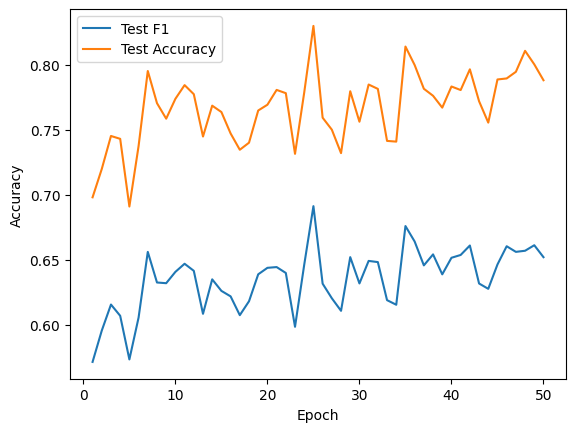

Best Accuracy: {'Acc': 0.8300065876152832, 'F1': 0.6913150642080458, 'Epoch': 25}
Best Macro-F1: {'Acc': 0.8300065876152832, 'F1': 0.6913150642080458, 'Epoch': 25}
##################################################  Shift -0.5  ##################################################


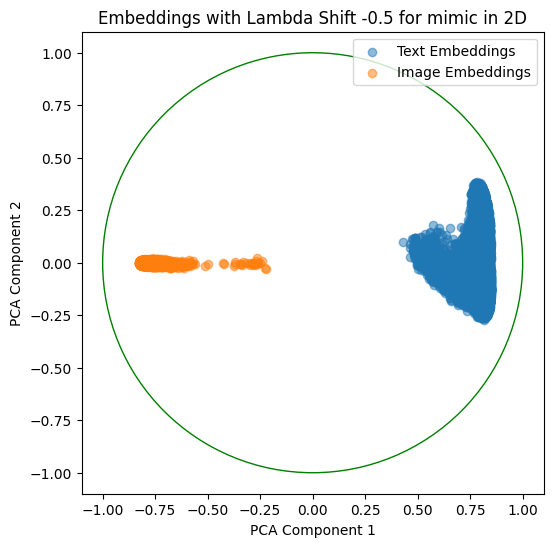

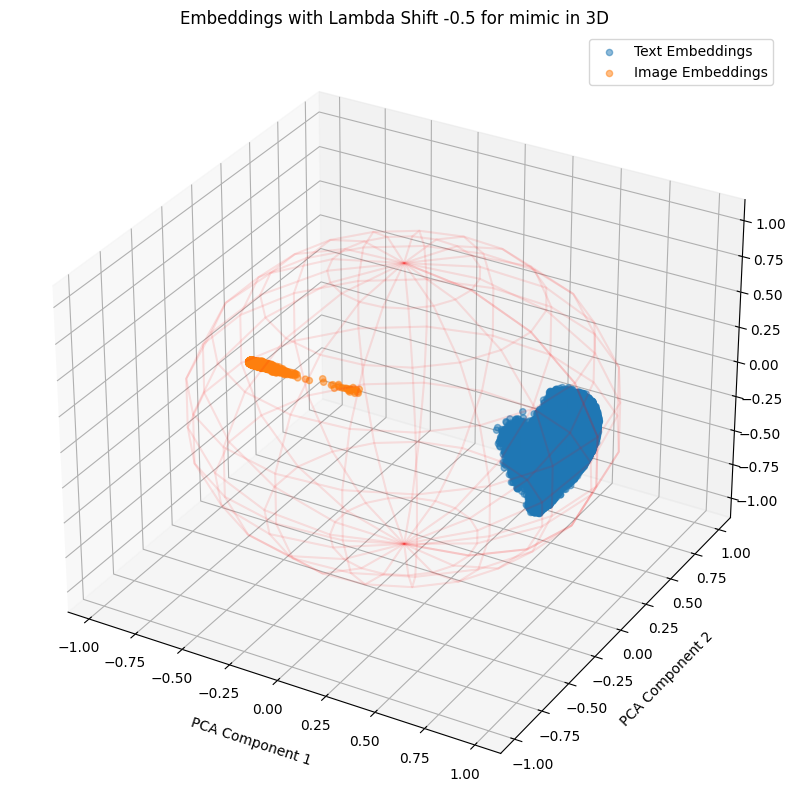

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.50 seconds
Total Training Time per Epoch: 1075.14 seconds
Average Inference Time per Epoch: 3.40 seconds
Total Inference Time per Epoch: 170.21 seconds


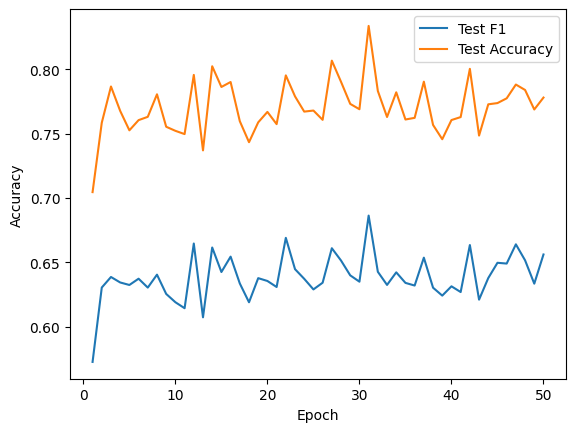

Best Accuracy: {'Acc': 0.833596837944664, 'F1': 0.6863117422329461, 'Epoch': 31}
Best Macro-F1: {'Acc': 0.833596837944664, 'F1': 0.6863117422329461, 'Epoch': 31}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.46 seconds
Total Training Time per Epoch: 922.95 seconds
Average Inference Time per Epoch: 3.39 seconds
Total Inference Time per Epoch: 169.49 seconds


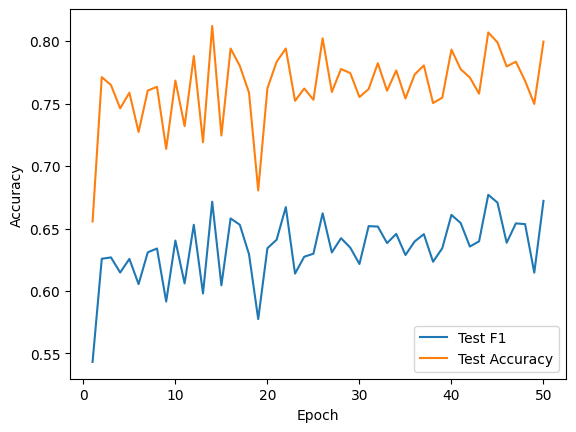

Best Accuracy: {'Acc': 0.8121541501976285, 'F1': 0.6714386858399377, 'Epoch': 14}
Best Macro-F1: {'Acc': 0.8069499341238472, 'F1': 0.6769420711356386, 'Epoch': 44}
##################################################  Shift -0.4  ##################################################


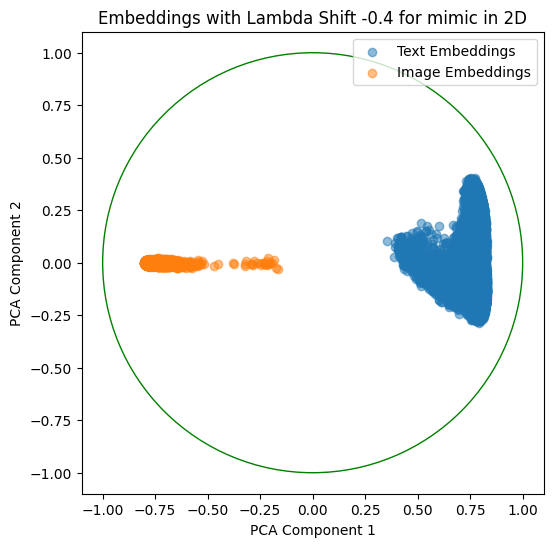

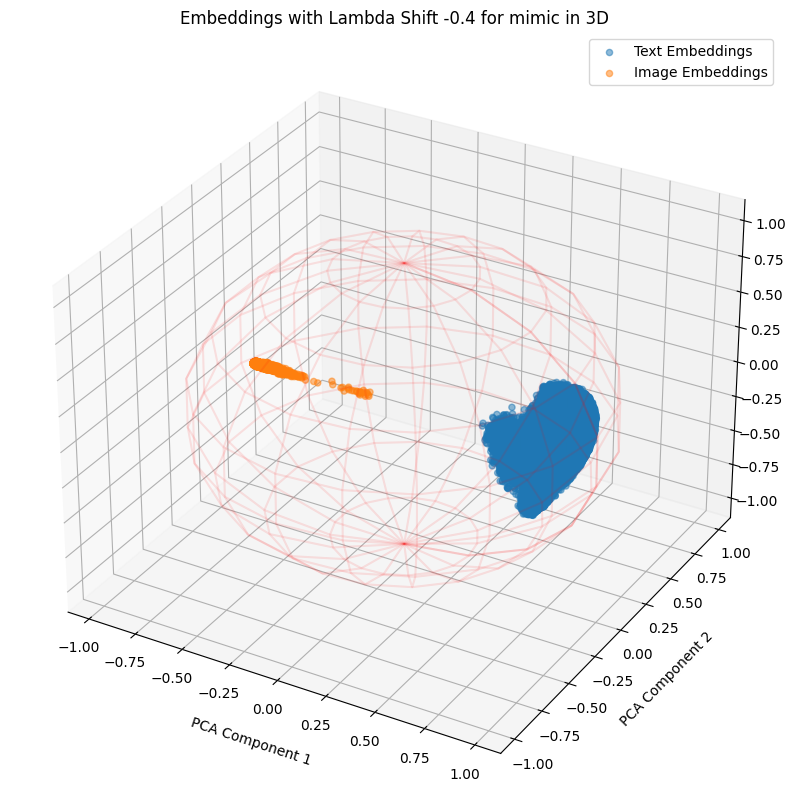

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 22.06 seconds
Total Training Time per Epoch: 1103.18 seconds
Average Inference Time per Epoch: 3.46 seconds
Total Inference Time per Epoch: 173.08 seconds


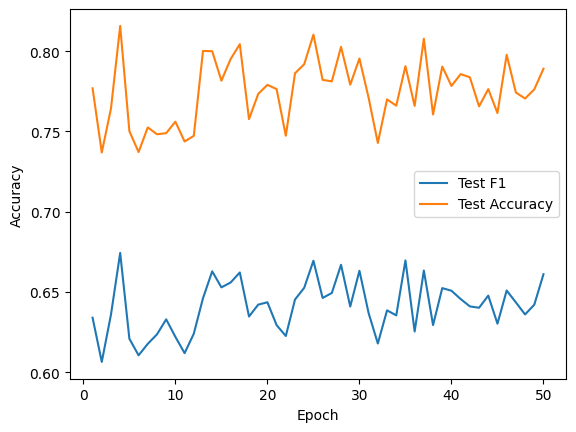

Best Accuracy: {'Acc': 0.8157773386034256, 'F1': 0.6742912953941205, 'Epoch': 4}
Best Macro-F1: {'Acc': 0.8157773386034256, 'F1': 0.6742912953941205, 'Epoch': 4}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.43 seconds
Total Training Time per Epoch: 921.63 seconds
Average Inference Time per Epoch: 3.38 seconds
Total Inference Time per Epoch: 169.17 seconds


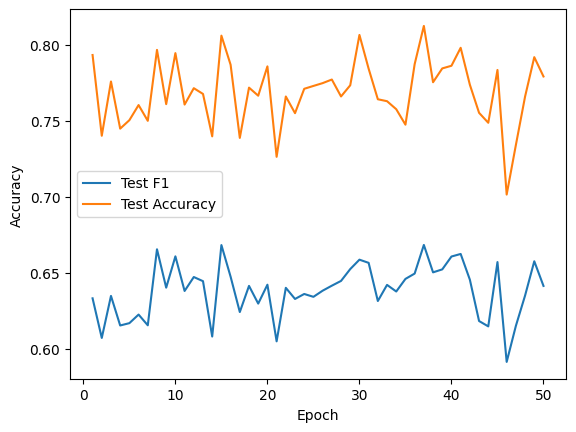

Best Accuracy: {'Acc': 0.8122859025032938, 'F1': 0.6681622054543939, 'Epoch': 37}
Best Macro-F1: {'Acc': 0.8122859025032938, 'F1': 0.6681622054543939, 'Epoch': 37}
##################################################  Shift -0.3  ##################################################


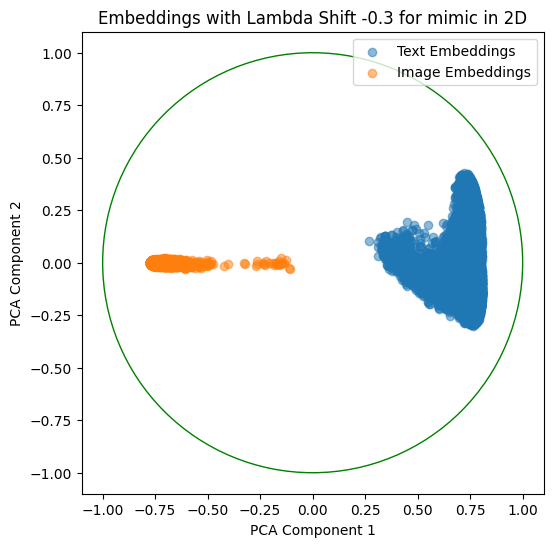

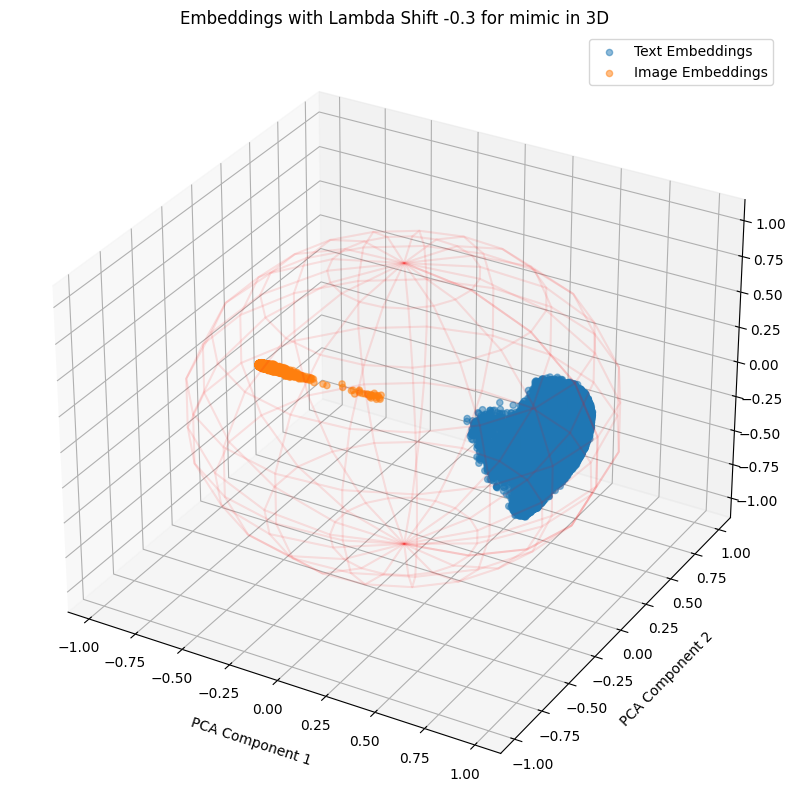

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.46 seconds
Total Training Time per Epoch: 1073.22 seconds
Average Inference Time per Epoch: 3.37 seconds
Total Inference Time per Epoch: 168.38 seconds


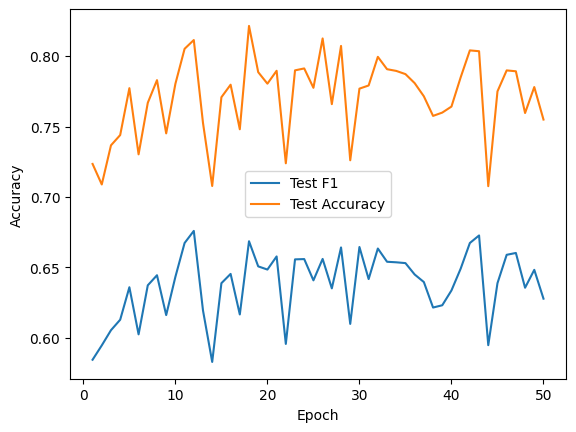

Best Accuracy: {'Acc': 0.821376811594203, 'F1': 0.6686112136972145, 'Epoch': 18}
Best Macro-F1: {'Acc': 0.8113636363636364, 'F1': 0.6759426412608228, 'Epoch': 12}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.32 seconds
Total Training Time per Epoch: 916.09 seconds
Average Inference Time per Epoch: 3.35 seconds
Total Inference Time per Epoch: 167.75 seconds


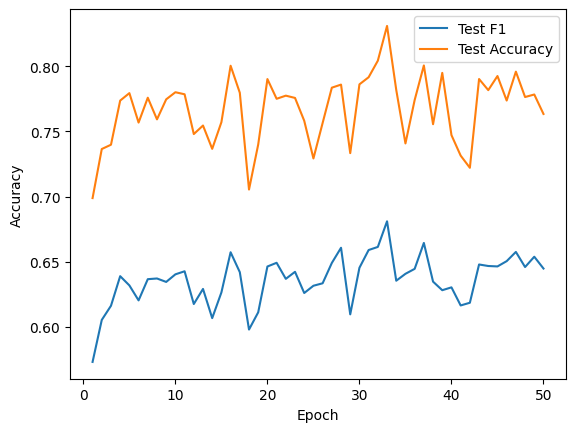

Best Accuracy: {'Acc': 0.8311264822134388, 'F1': 0.6809833045053673, 'Epoch': 33}
Best Macro-F1: {'Acc': 0.8311264822134388, 'F1': 0.6809833045053673, 'Epoch': 33}
##################################################  Shift -0.2  ##################################################


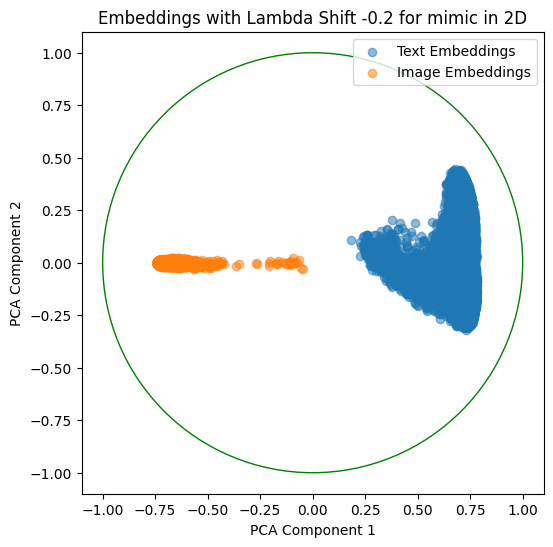

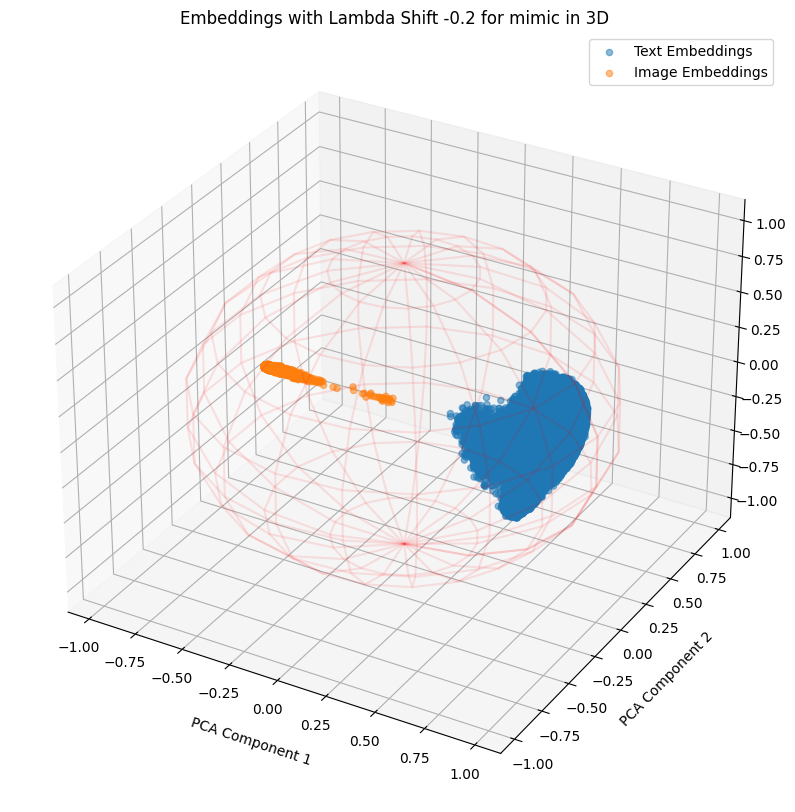

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.24 seconds
Total Training Time per Epoch: 1062.12 seconds
Average Inference Time per Epoch: 3.36 seconds
Total Inference Time per Epoch: 167.99 seconds


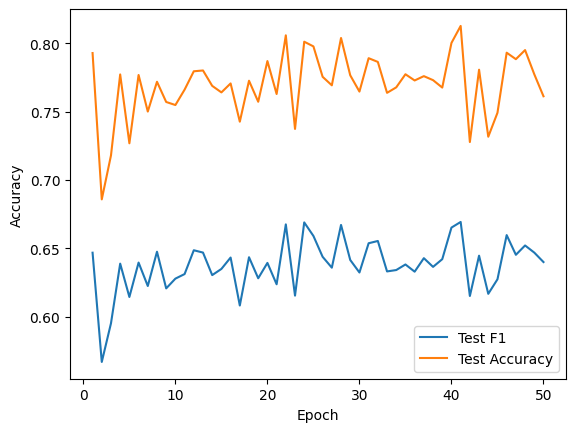

Best Accuracy: {'Acc': 0.8127470355731226, 'F1': 0.6692641640090982, 'Epoch': 41}
Best Macro-F1: {'Acc': 0.8127470355731226, 'F1': 0.6692641640090982, 'Epoch': 41}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.29 seconds
Total Training Time per Epoch: 914.45 seconds
Average Inference Time per Epoch: 3.35 seconds
Total Inference Time per Epoch: 167.54 seconds


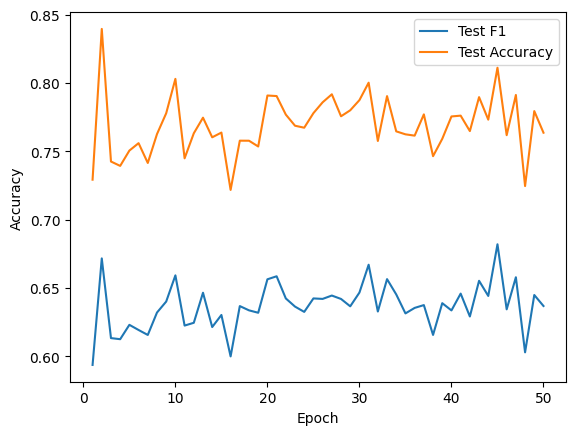

Best Accuracy: {'Acc': 0.839558629776021, 'F1': 0.6716925170276251, 'Epoch': 2}
Best Macro-F1: {'Acc': 0.8111660079051384, 'F1': 0.6820142080063059, 'Epoch': 45}
##################################################  Shift -0.1  ##################################################


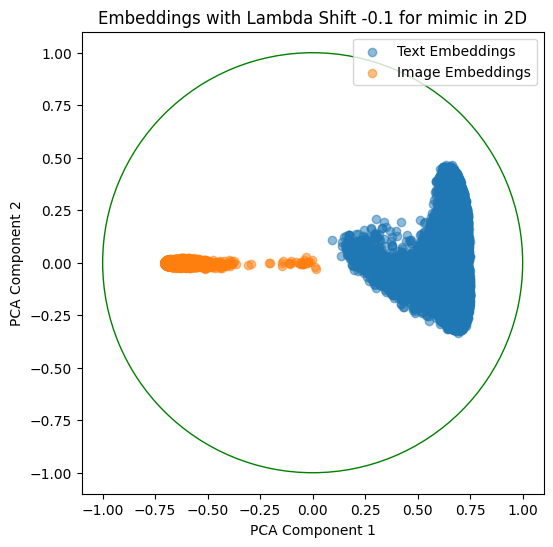

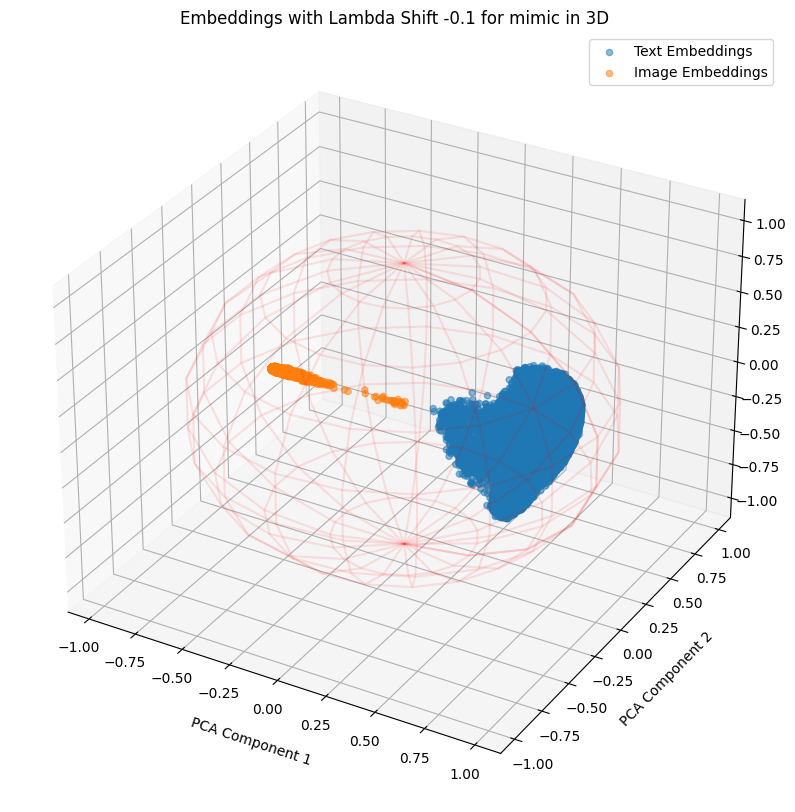

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.58 seconds
Total Training Time per Epoch: 1079.14 seconds
Average Inference Time per Epoch: 3.35 seconds
Total Inference Time per Epoch: 167.50 seconds


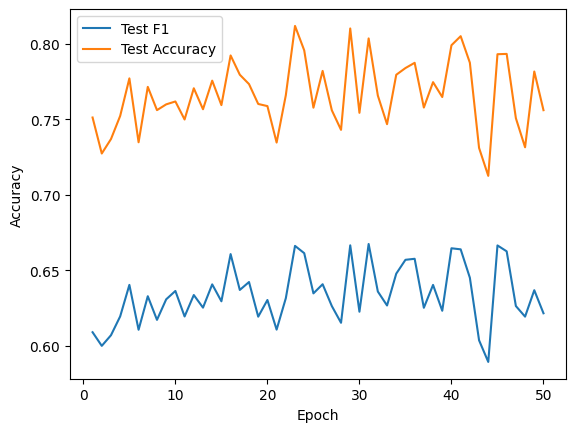

Best Accuracy: {'Acc': 0.8116930171277997, 'F1': 0.6662127754161714, 'Epoch': 23}
Best Macro-F1: {'Acc': 0.803425559947299, 'F1': 0.6674649871911895, 'Epoch': 31}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.18 seconds
Total Training Time per Epoch: 908.98 seconds
Average Inference Time per Epoch: 3.38 seconds
Total Inference Time per Epoch: 168.91 seconds


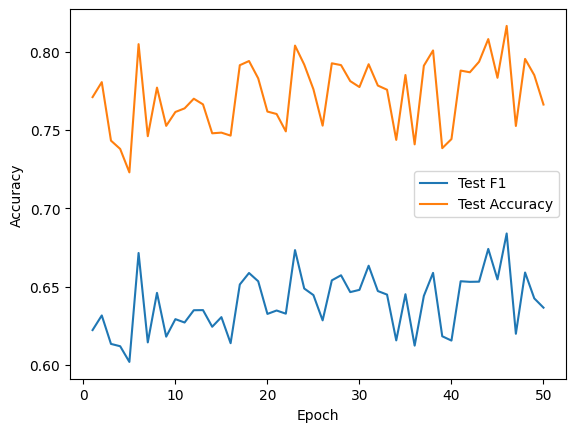

Best Accuracy: {'Acc': 0.8163702239789197, 'F1': 0.6839331969436248, 'Epoch': 46}
Best Macro-F1: {'Acc': 0.8163702239789197, 'F1': 0.6839331969436248, 'Epoch': 46}
##################################################  Shift 0  ##################################################


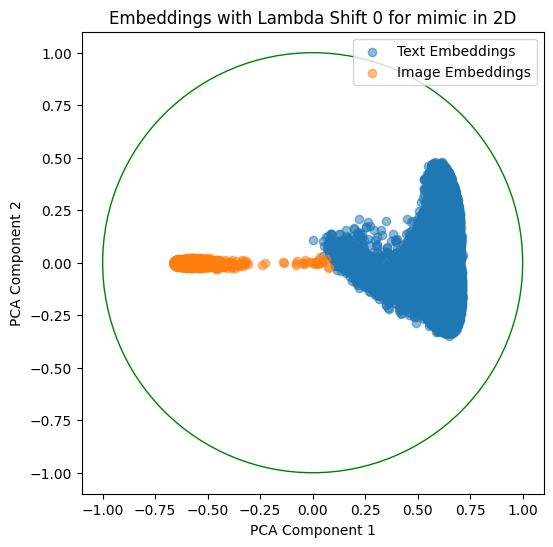

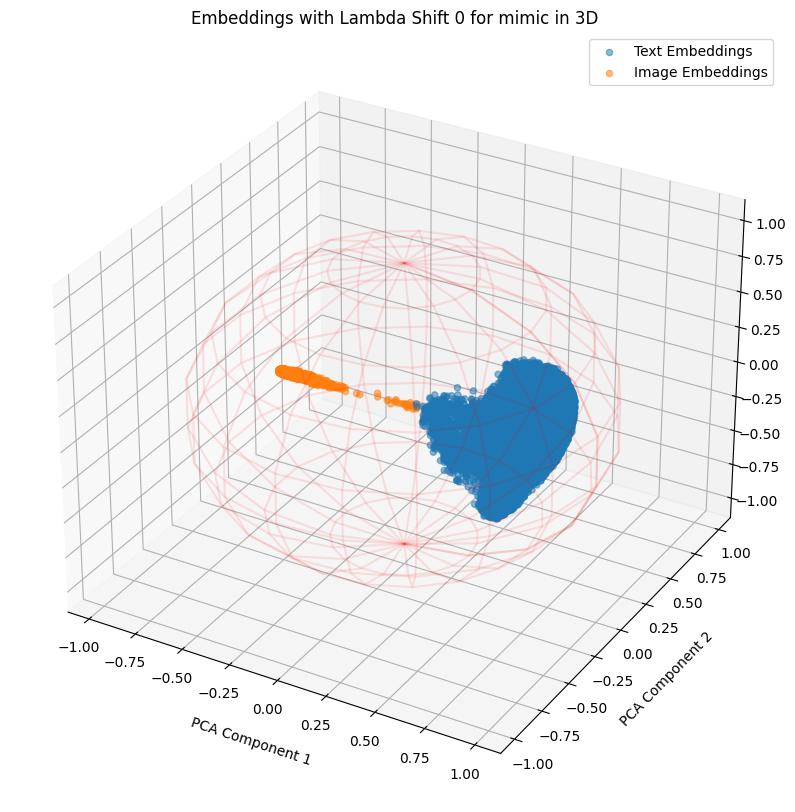

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.91 seconds
Total Training Time per Epoch: 1095.26 seconds
Average Inference Time per Epoch: 3.37 seconds
Total Inference Time per Epoch: 168.37 seconds


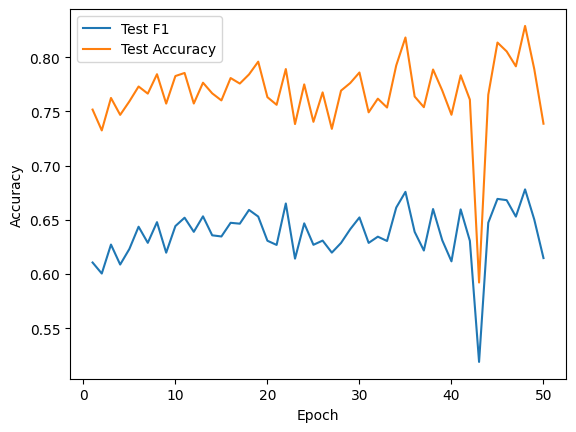

Best Accuracy: {'Acc': 0.8289196310935442, 'F1': 0.6780692929954385, 'Epoch': 48}
Best Macro-F1: {'Acc': 0.8289196310935442, 'F1': 0.6780692929954385, 'Epoch': 48}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.71 seconds
Total Training Time per Epoch: 885.32 seconds
Average Inference Time per Epoch: 3.39 seconds
Total Inference Time per Epoch: 169.67 seconds


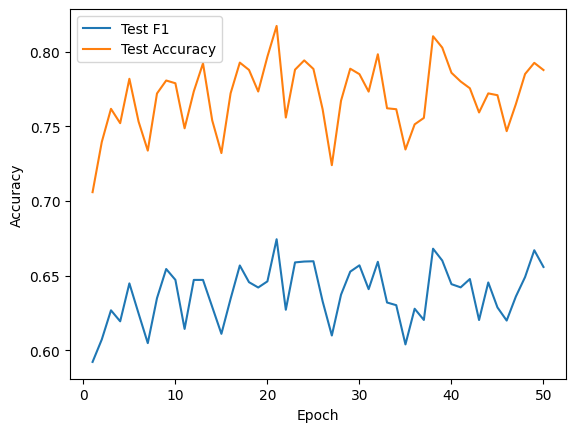

Best Accuracy: {'Acc': 0.8172924901185771, 'F1': 0.6744126416775635, 'Epoch': 21}
Best Macro-F1: {'Acc': 0.8172924901185771, 'F1': 0.6744126416775635, 'Epoch': 21}
##################################################  Shift 0.1  ##################################################


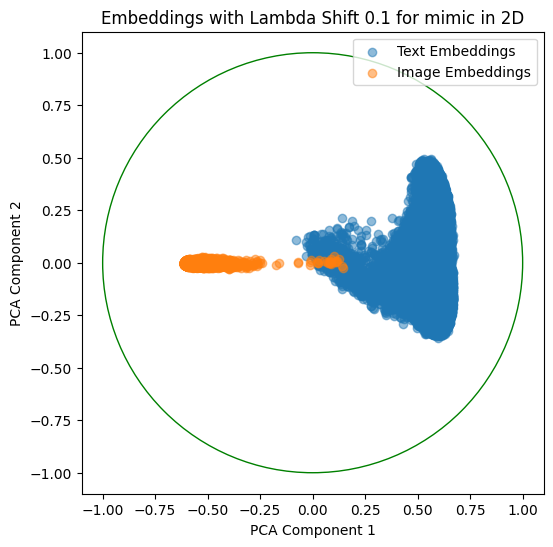

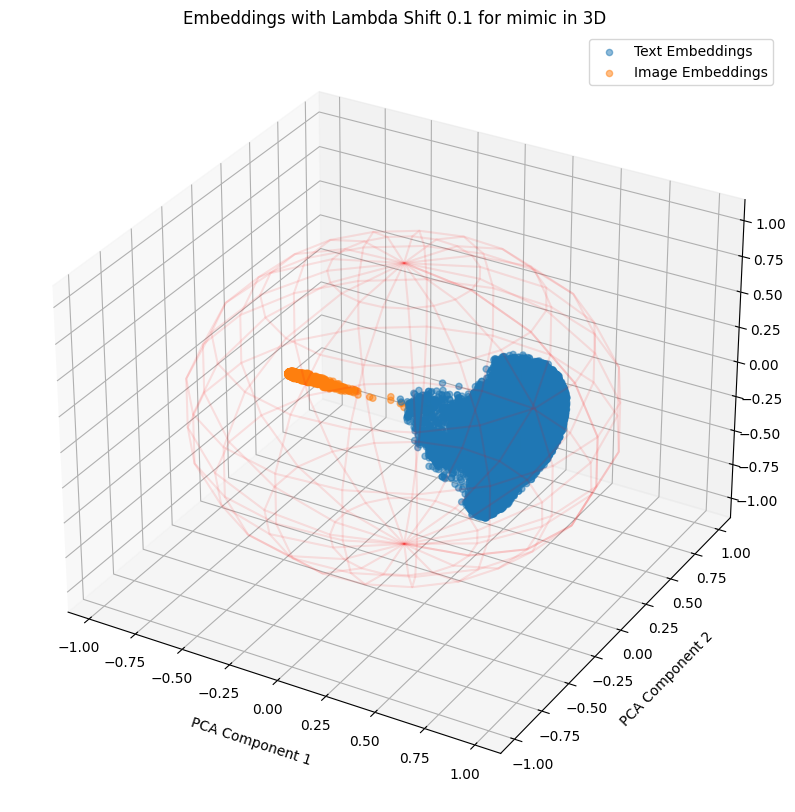

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.90 seconds
Total Training Time per Epoch: 1045.19 seconds
Average Inference Time per Epoch: 3.38 seconds
Total Inference Time per Epoch: 168.97 seconds


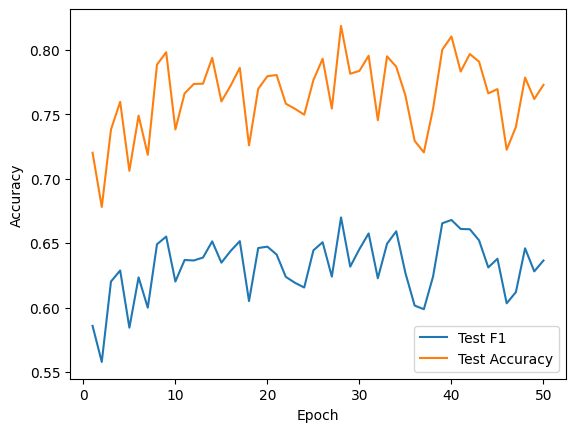

Best Accuracy: {'Acc': 0.8184782608695652, 'F1': 0.6699045979495679, 'Epoch': 28}
Best Macro-F1: {'Acc': 0.8184782608695652, 'F1': 0.6699045979495679, 'Epoch': 28}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 16.61 seconds
Total Training Time per Epoch: 830.28 seconds
Average Inference Time per Epoch: 3.38 seconds
Total Inference Time per Epoch: 168.75 seconds


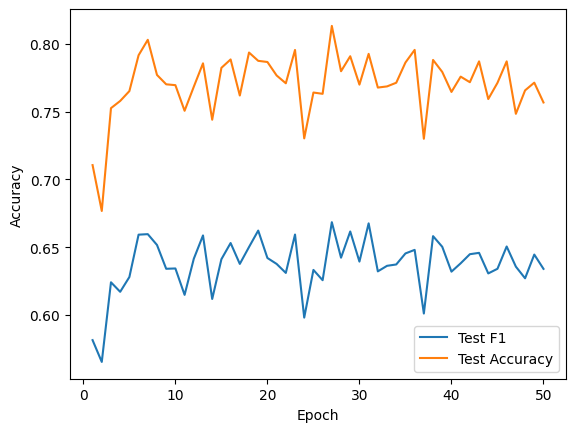

Best Accuracy: {'Acc': 0.8132740447957839, 'F1': 0.6684606396401271, 'Epoch': 27}
Best Macro-F1: {'Acc': 0.8132740447957839, 'F1': 0.6684606396401271, 'Epoch': 27}
##################################################  Shift 0.2  ##################################################


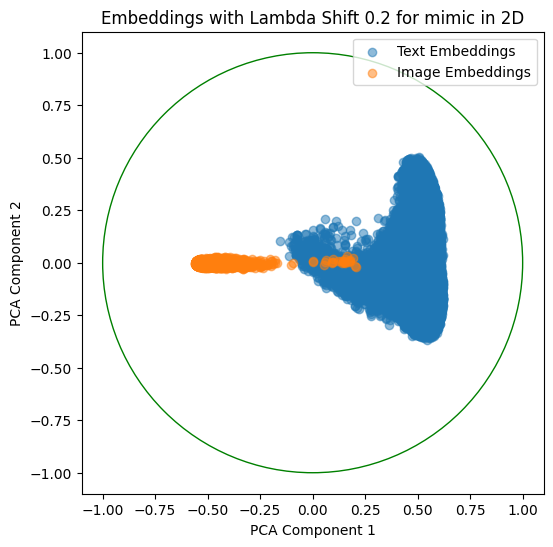

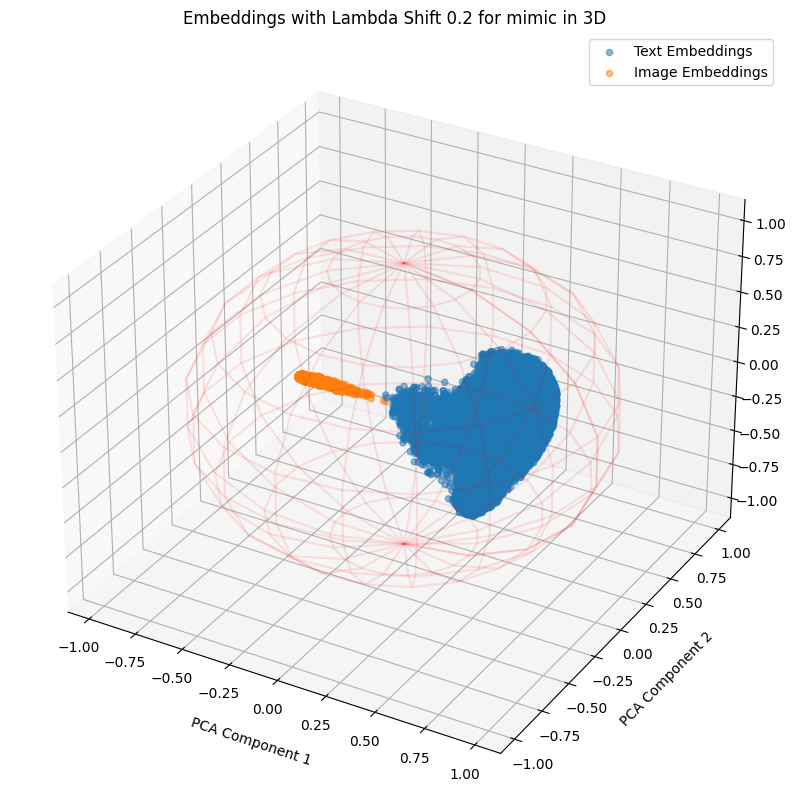

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.64 seconds
Total Training Time per Epoch: 1082.14 seconds
Average Inference Time per Epoch: 3.39 seconds
Total Inference Time per Epoch: 169.50 seconds


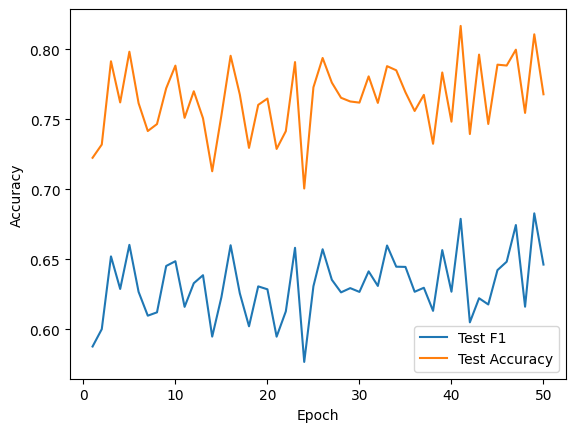

Best Accuracy: {'Acc': 0.8166666666666667, 'F1': 0.6788982000869167, 'Epoch': 41}
Best Macro-F1: {'Acc': 0.8106719367588933, 'F1': 0.6828124302599025, 'Epoch': 49}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.48 seconds
Total Training Time per Epoch: 924.04 seconds
Average Inference Time per Epoch: 3.39 seconds
Total Inference Time per Epoch: 169.63 seconds


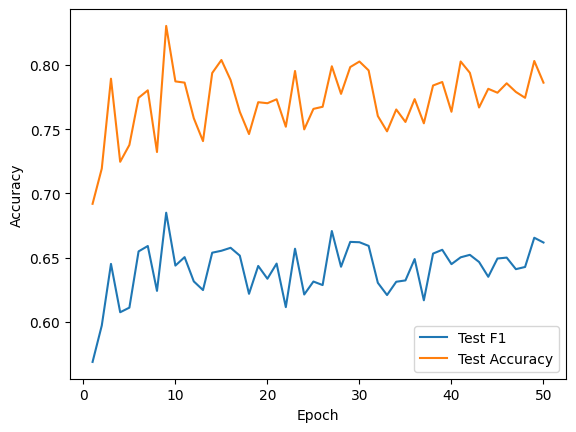

Best Accuracy: {'Acc': 0.830467720685112, 'F1': 0.6849683102518734, 'Epoch': 9}
Best Macro-F1: {'Acc': 0.830467720685112, 'F1': 0.6849683102518734, 'Epoch': 9}
##################################################  Shift 0.3  ##################################################


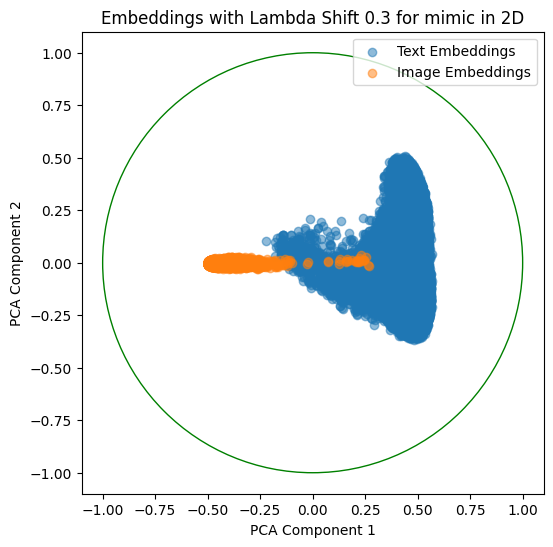

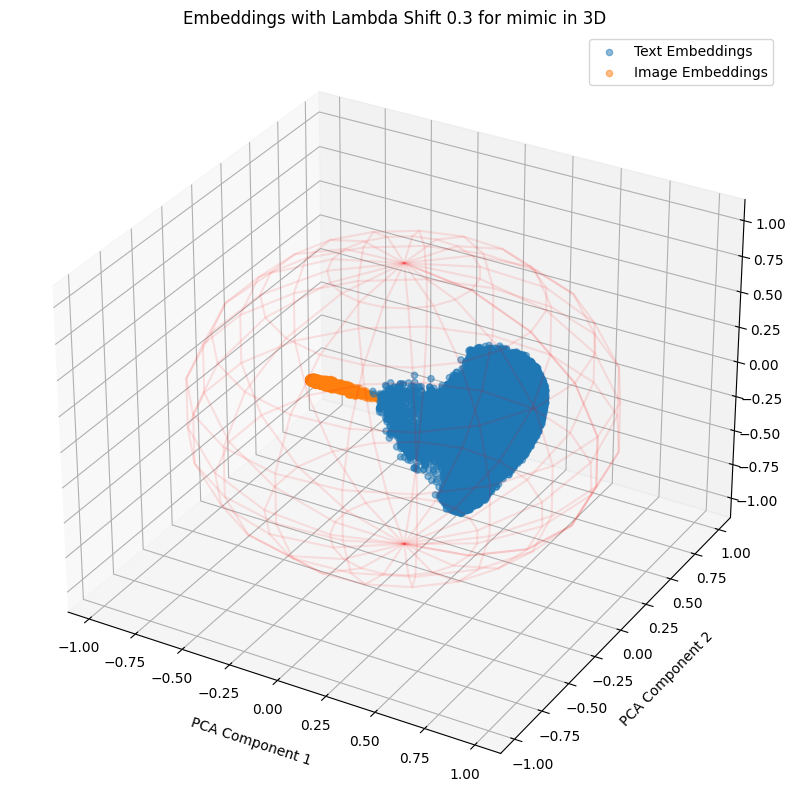

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 19.99 seconds
Total Training Time per Epoch: 999.29 seconds
Average Inference Time per Epoch: 3.37 seconds
Total Inference Time per Epoch: 168.60 seconds


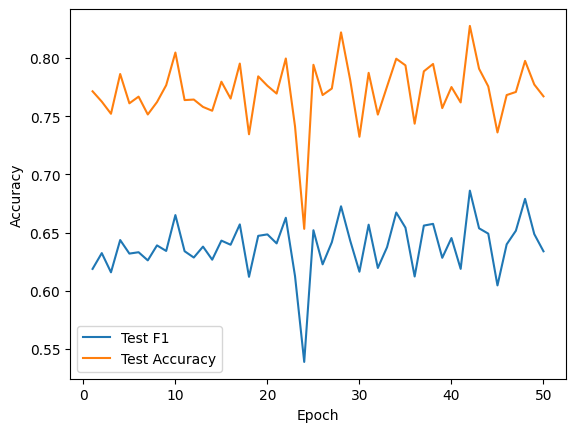

Best Accuracy: {'Acc': 0.8275032938076416, 'F1': 0.6860345002394339, 'Epoch': 42}
Best Macro-F1: {'Acc': 0.8275032938076416, 'F1': 0.6860345002394339, 'Epoch': 42}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.67 seconds
Total Training Time per Epoch: 883.55 seconds
Average Inference Time per Epoch: 3.35 seconds
Total Inference Time per Epoch: 167.70 seconds


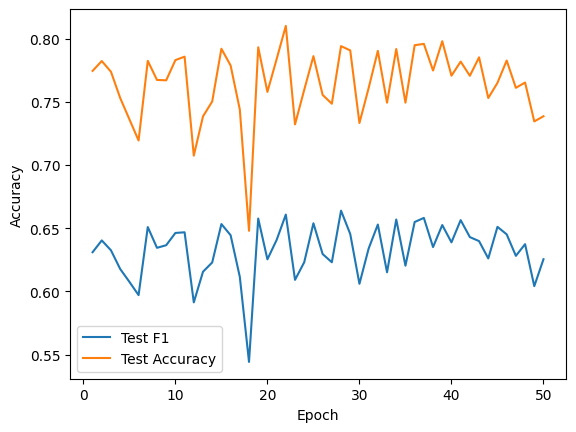

Best Accuracy: {'Acc': 0.8100131752305665, 'F1': 0.6608128912071525, 'Epoch': 22}
Best Macro-F1: {'Acc': 0.7940382081686429, 'F1': 0.6639168310568734, 'Epoch': 28}
##################################################  Shift 0.4  ##################################################


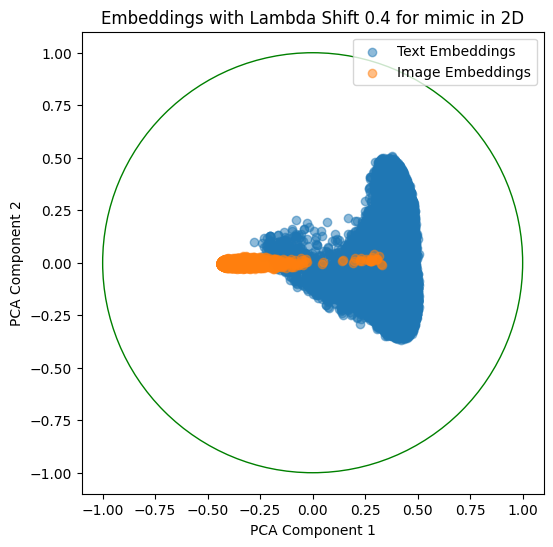

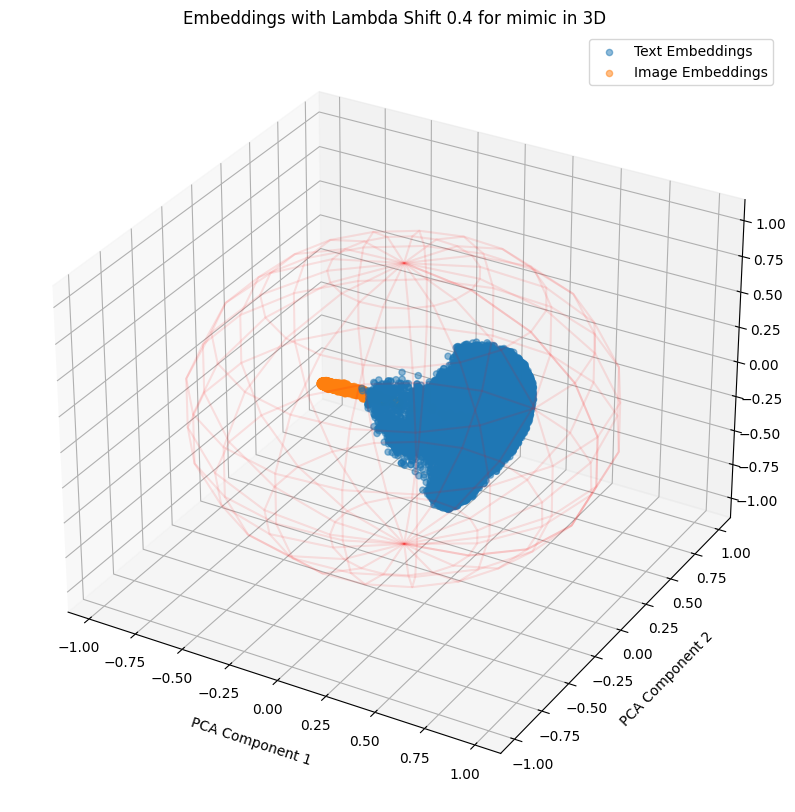

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492


In [ ]:
# Assuming df is your DataFrame
lambda_shift_values = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Negative values bring embeddings closer, positive values push them apart
#lambda_shift_values = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]  # Negative values bring embeddings closer, positive values push them apart

# Normalize initial embeddings
df[text_columns] = normalize_embeddings(df[text_columns].values)
df[image_columns] = normalize_embeddings(df[image_columns].values)

# Dataframe with shifted values:
df_shifted = df.copy()

results = {}

for lambda_shift in lambda_shift_values:
    
    print('#'*50, f' Shift {lambda_shift} ', '#'*50)
    
    # Extract embeddings
    text_embeddings = df[text_columns].values
    image_embeddings = df[image_columns].values
    
    # Modify and normalize embeddings
    text_embeddings_shifted, image_embeddings_shifted = modify_and_normalize_embeddings(text_embeddings, image_embeddings, lambda_shift)
    
    # Update column names based on the new dimensions
    if text_embeddings.shape[1] < text_embeddings_shifted.shape[1]:
        text_columns_updated = update_column_names(text_columns, text_embeddings_shifted.shape[1])
    else: 
        text_columns_updated = text_columns
        
    if image_embeddings.shape[1] < image_embeddings_shifted.shape[1]: 
        image_columns_updated = update_column_names(image_columns, image_embeddings_shifted.shape[1])
    else:
        image_columns_updated = image_columns
    
    # Update DataFrame with shifted embeddings
    df_shifted[text_columns_updated] = text_embeddings_shifted
    df_shifted[image_columns_updated] = image_embeddings_shifted
    
    # Visualize shifted embeddings
    visualize_embeddings(text_embeddings_shifted, image_embeddings_shifted, f'Embeddings with Lambda Shift {lambda_shift} for {DATASET}', lambda_shift, DATASET)
    
    # Split the data
    train_df, test_df = split_data(df_shifted)
    
    
    # Process and one-hot encode labels for training set
    train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
    test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

    train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
    test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    text_input_size = len(text_columns)
    image_input_size = len(image_columns)

    ### Models:
    # Train early fusion model
    print("Training Early Fusion Model:")
    accuracy, precision, recall, f1, best = train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"early_({lambda_shift})"] = best
    
    # Train late fusion model
    print("Training Late Fusion Model:")
    accuracy, precision, recall, f1, best = train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"late_({lambda_shift})"] = best

In [ ]:
print('Results Early Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'early_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'early_({lambda_shift})']['Macro-F1']}")
    
print('Results Late Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'late_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'late_({lambda_shift})']['Macro-F1']}")

In [ ]:
plot_results(results, lambda_shift_values, DATASET)